Problem 1,2,3,7 were solved in this pdf.

Problem 4,5,6 were solved in another file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [3]:
np.seterr(invalid='ignore', over='ignore')  # suppress warning caused by division by inf

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

Problem 1

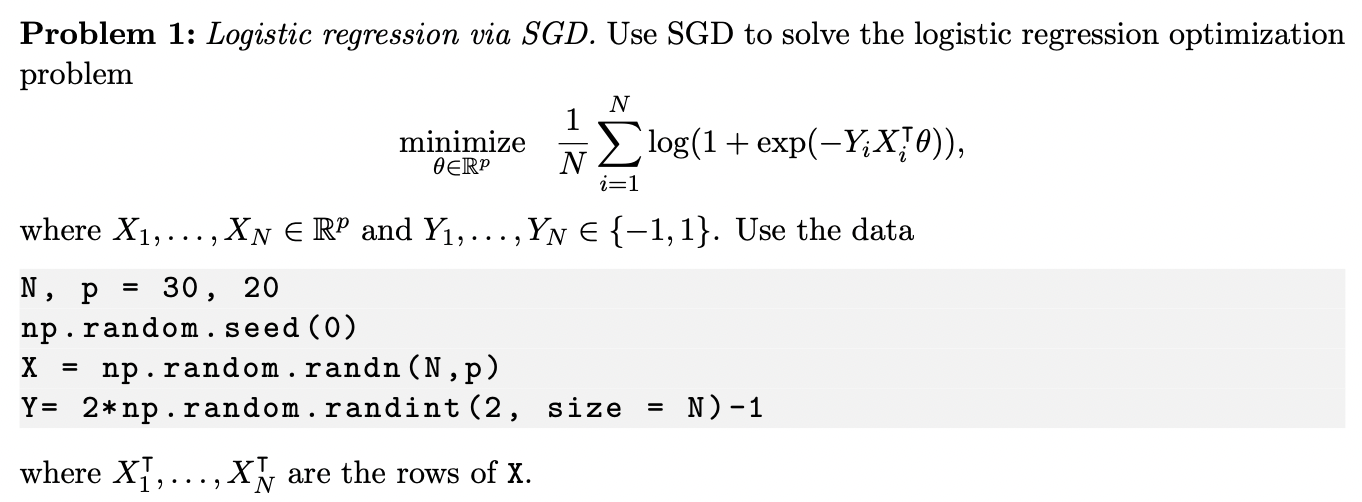

In [4]:
N, p = 30, 20 
np.random.seed(0)
X = np.random.randn(N,p) # generates N vectors of R^p; form of np.array
Y= 2*np.random.randint(2, size = N)-1 # 2*(0,1)-1= -1 or 1 ; generates N scalars

Ans ) The minimizer value of theta is [-0.48651935  1.23818473  0.41953234  4.96438239 -1.58543155 -0.91604375
 -4.6043269  -2.67397853  1.16083962  2.06781531  4.87451857 -7.32035519
 -0.31449899 -2.10115613  4.67614609  5.37479007 -4.47990975  0.67006012
 -0.76432097 -7.14086801].


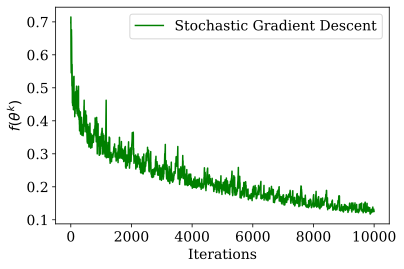

In [5]:
theta = np.zeros(p)
alpha = 0.1  #0.1 is roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha*(np.exp(-Y[ind]*X[ind,:]@theta)*(-Y[ind]))*X[ind,:]/(1+np.exp(-Y[ind]*X[ind,:]@theta))
    f_val.append(N**(-1)*sum([np.log(1+np.exp(-Y[i]*X[i,:]@theta)) for i in range(N)]))

print(f"Ans ) The minimizer value of theta is {theta}.")
plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

Problem 2

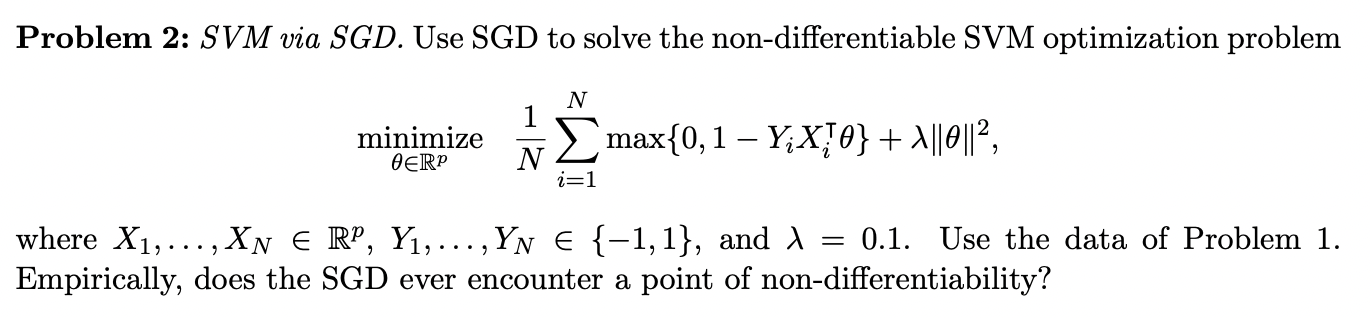

[ 0.06872846  0.03260651 -0.32546856  0.17607469 -0.03492844 -0.15437353
 -0.30438171 -0.2029697   0.27944936 -0.14706277  0.08053559 -0.13851692
  0.12392779 -0.22784955  0.22965351  0.25477181 -0.35999374 -0.09447343
 -0.01532621 -0.47561883]


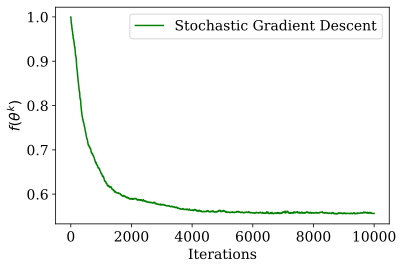

In [6]:
# Using same data with previous problem

theta = np.zeros(p)
alpha = 0.001  #0.1 is roughly the best value
lb = 0.1

K = 10000
check = 0
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    if Y[ind]*X[ind,:]@theta>1:
      theta -= alpha*(lb*2*theta)
    elif Y[ind]*X[ind,:]@theta==1:
      check +=1
      theta -= alpha*(lb*2*theta - Y[ind]*X[ind,:])
    else:
      theta -= alpha*(lb*2*theta - Y[ind]*X[ind,:])
    f_val.append(lb*theta.T@theta+N**(-1)*sum([max(0,1-Y[i]*X[i,:]@theta) for i in range(N)]))

if check>=1:
  print("Encountering non-differentiable point!")

print(theta)
plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(K)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

Ans ) Encountering a point of non-differentiability didn't happen when I tried.

Problem 3

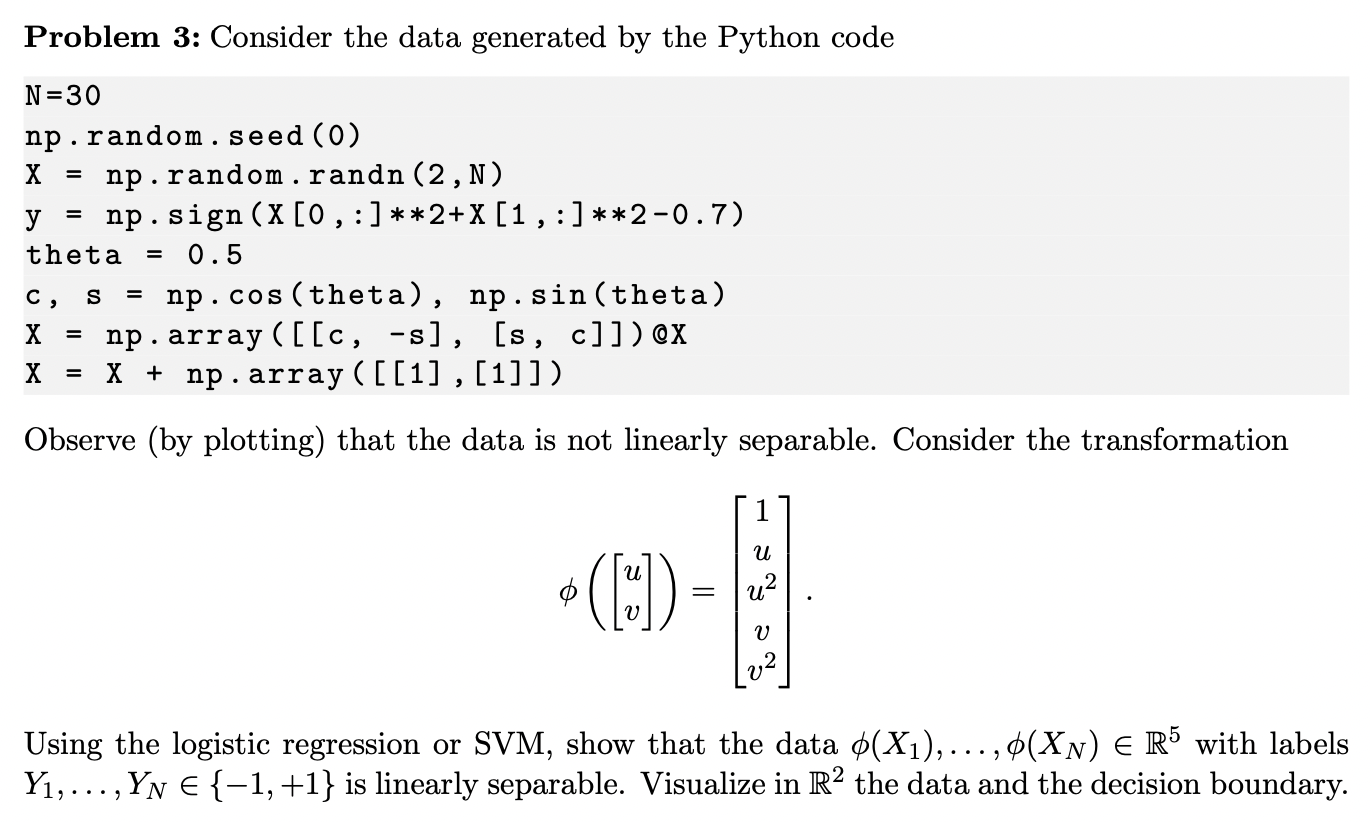

In [7]:
N=30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0,:]**2+X[1,:]**2-0.7) 
theta = 0.5
c, s = np.cos(theta), np.sin(theta) 
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]]) # add 1,1 pointwise

In [8]:
def phi(u,v):
  return np.array([1,u,u**2,v,v**2])

In [9]:
import copy as c
datasets = [phi(X[0][i],X[1][i]) for i in range(N)]
X_=c.deepcopy(datasets)
Y_=c.deepcopy(y)

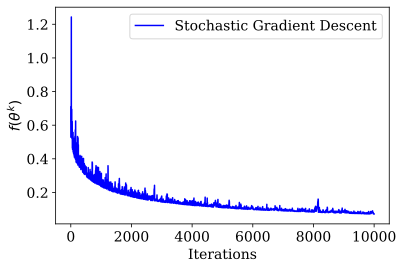

[  6.7173994  -10.32495424   4.9762752   -8.64245319   3.64384716]


In [10]:
# using the logistic regression
theta = np.zeros(5)
alpha = 0.1  #0.1 is roughly the best value

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha*(np.exp(-Y_[ind]*X_[ind]@theta)*(-Y_[ind]))*X_[ind]/(1+np.exp(-Y_[ind]*X_[ind]@theta))
    f_val.append(N**(-1)*sum([np.log(1+np.exp(-Y_[i]*X_[i]@theta)) for i in range(N)]))

plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(K)),f_val, color = "blue", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

print(theta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


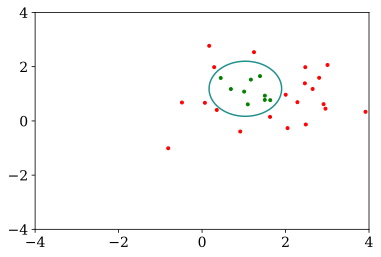

In [11]:
xx = np.linspace(-4,4,1024)
yy = np.linspace(-4,4,1024)
xx,yy = np.meshgrid(xx,yy)
Z = theta@phi(xx,yy)
plt.contour(xx,yy,Z,0,color='blue')

pt_pos = [[X[0][i],X[1][i]] for i in range(N) if theta@phi(X[0][i],X[1][i])>0]
pt_neg = [[X[0][i],X[1][i]] for i in range(N) if theta@phi(X[0][i],X[1][i])<0]
pt_pos_x = [pt_pos[i][0] for i in range(len(pt_pos))]
pt_pos_y = [pt_pos[i][1] for i in range(len(pt_pos))]
pt_neg_x = [pt_neg[i][0] for i in range(len(pt_neg))]
pt_neg_y = [pt_neg[i][1] for i in range(len(pt_neg))]

plt.plot(pt_pos_x,pt_pos_y,'.',color="red")
plt.plot(pt_neg_x,pt_neg_y,'.',color="green")

The purpose of using logistic regression is to classify the sign of each data. 

If we minimise KL-divergence, then the dismatch of sign shall vanish.

Problem 7

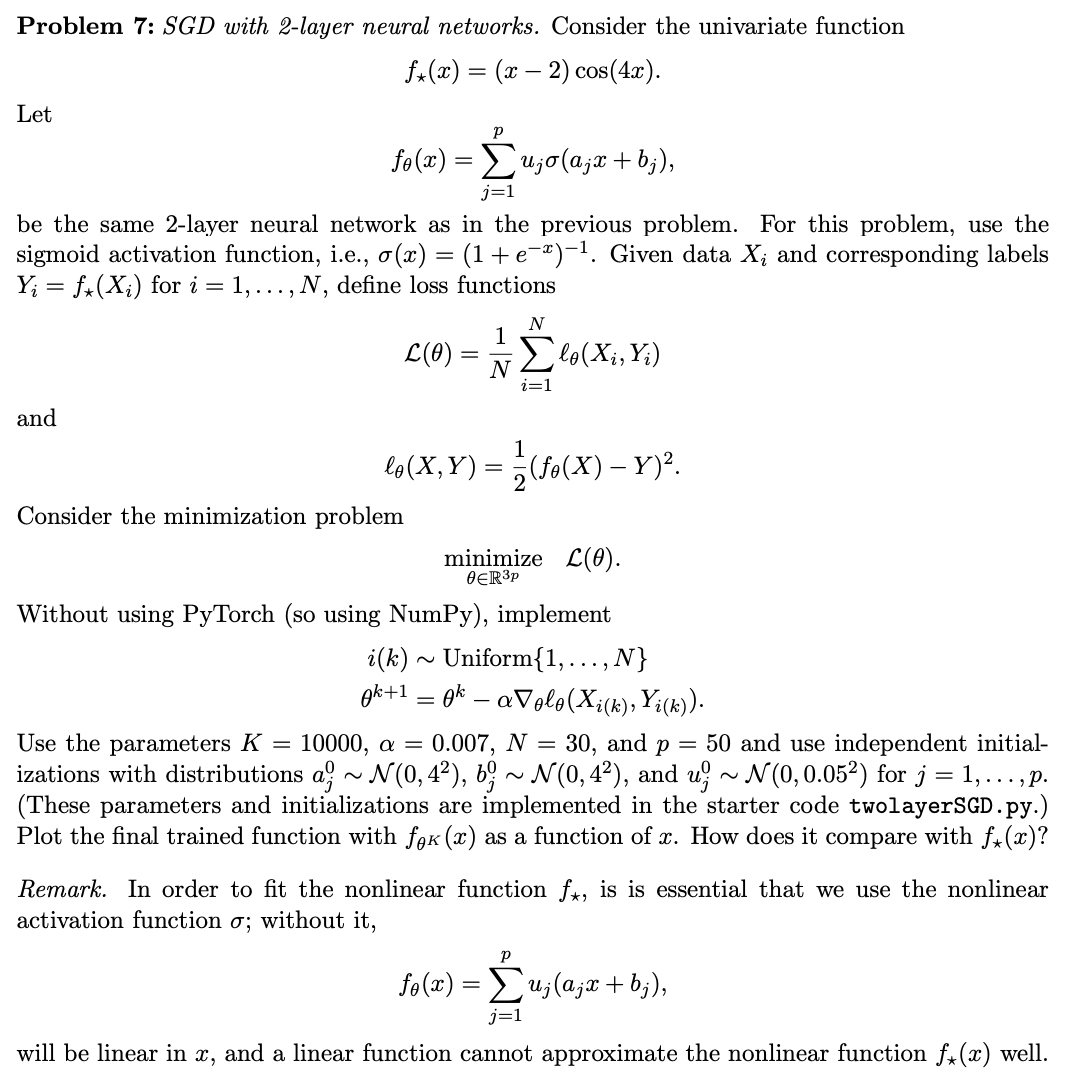

In [12]:
def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))

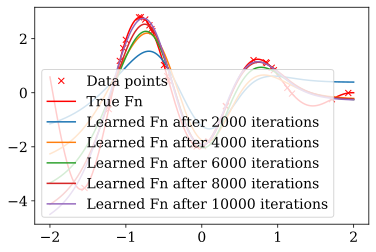

<Figure size 432x288 with 0 Axes>

In [14]:
X = np.random.normal(loc = 0.0, scale = 1.0, size = N) # given data
Y = f_true(X) # given data

def f_th(theta, x):
  # np.reshape(x,(-1,1)) : if x : [1,2,3,4,5,6,7,8] and (-1,1) -> [[1],[2],...,[8]] : 8/1,1
  # if (-1,2) -> [[1,2],...,[7,8]]
  # theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p])
  # A return value is an array. It's because x is formed as linspace, so it approaches the elements one by one.
  # (axis=0 means approaching values by a_j,b_j,u_j)
  return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

# def diff_f_th(theta, x) :
# pass


def f_th_oneelem(theta,x):
  return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * x + theta[p : 2*p]))

def grad_of_loss(theta,x,y):
  u_ = [sigmoid(theta[i]*x+theta[p+i]) for i in range(p)]
  b_ = [sigmoid_prime(theta[i]*x+theta[p+i])*theta[2*p+i] for i in range(p)]
  a_ = [sigmoid_prime(theta[i]*x+theta[p+i])*theta[2*p+i]*x for i in range(p)]
  return ((f_th_oneelem(theta,x))-y) * np.concatenate((a_,b_,u_),axis=None)

xx = np.linspace(-2,2,1024) # training data
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K):
  ind = np.random.randint(N)
  theta -= alpha * grad_of_loss(theta,X[ind],Y[ind])
  if (k+1)%2000 == 0 :
    plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()
plt.savefig('plot.png')

Ans ) As shown in the picture above, increasing the number of trials gradually leads to a real function, like the convergence of Taylor series.